In [29]:
# pyrates imports
from pyrates.frontend import CircuitTemplate
from pyrates.backend import ComputeGraph
from pyrates.utility import plot_timeseries

# additional imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.reload_library()
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 28
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 28
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['legend.fontsize'] = 20
plt.rcParams["figure.figsize"] = (8,5)
from copy import deepcopy
from seaborn import cubehelix_palette

%matplotlib inline

Replication of Bifurcations under Extrinsic Forcing
==========================================

In [39]:
# parameter definition
dt = 1e-3
T = 42.
inp = np.zeros((int(T/dt), 1))
inp[int(6./dt):int((T-12.)/dt)] = 3.

In [ ]:
# pyrates simulation
circuit = CircuitTemplate.from_yaml("pyrates.examples.simple_nextgen_NMM.Net1").apply()
compute_graph = ComputeGraph(circuit, vectorization="none", dt=dt)
result = compute_graph.run(T, inputs={("Pop1.0", "Op_e.0", "inp"): inp},
                           outputs={"r": ("Pop1.0", "Op_e.0", "r"),
                                    "v": ("Pop1.0", "Op_e.0", "v")})

# add input to results data frame
result['input'] = inp[:, 0]
result = result.iloc[result.index >1.0, :]

moving edge operators to nodes...
checking net config for consistency...
start of vectorization
...finished after 3.361701965332031e-05 seconds.


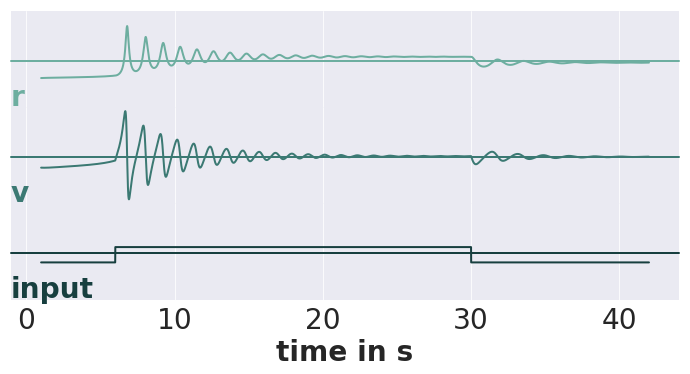

In [43]:
# plotting
cm = cubehelix_palette(n_colors=3, start=2.5, rot=-0.1, light=0.6, dark=0.2)
ax = plot_timeseries(result, plot_style='ridge_plot', demean=True, hspace=-.01, fontsize=28, aspect=6, height=2.0, 
                     cmap=cm)
fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(10., 5.5)
ax.set_xlabel('time in s')
plt.savefig('PyRates_Montbrio_example_1.svg', format='svg')

In [45]:
T = 82.
inp = np.zeros((int(T/dt), 1))
inp[int(4./dt):, 0] = 3. * np.sin(np.pi/20. * np.arange(4., T, dt))

In [46]:
# pyrates simulation
circuit = CircuitTemplate.from_yaml("pyrates.examples.simple_nextgen_NMM.Net1").apply()
compute_graph = ComputeGraph(circuit, vectorization="none", dt=dt)
result = compute_graph.run(T, inputs={("Pop1.0", "Op_e.0", "inp"): inp},
                           outputs={"r": ("Pop1.0", "Op_e.0", "r"),
                                    "v": ("Pop1.0", "Op_e.0", "v")})

# add input to results data frame
result['input'] = inp[:, 0]
result = result.iloc[result.index >1.0, :]

moving edge operators to nodes...
checking net config for consistency...
start of vectorization
...finished after 3.814697265625e-05 seconds.


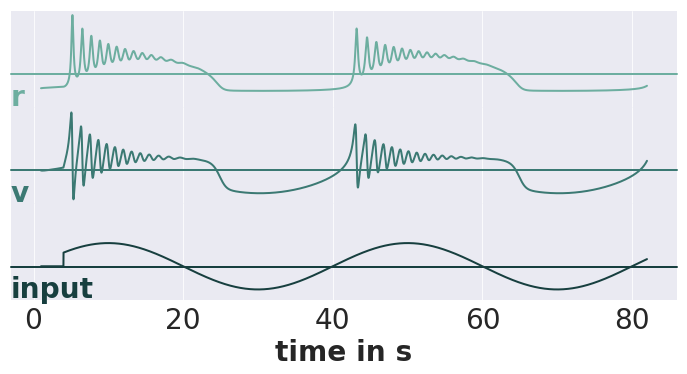

In [47]:
# plotting
cm = cubehelix_palette(n_colors=3, start=2.5, rot=-0.1, light=0.6, dark=0.2)
plot_timeseries(result, plot_style='ridge_plot', demean=True, hspace=-.01, fontsize=28, aspect=6, height=2.0, cmap=cm)
fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(10., 5.5)
ax.set_xlabel('time in s')
plt.savefig('PyRates_Montbrio_example_2.svg', format='svg')